# Signal around ZEB instances

In [31]:
library(rtracklayer)
library(GenomicRanges)
library(ggplot2)

In [32]:
zeb_hits = read.table("../20210322_BPNet_synthetic/data/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/ZEB.cluster_idx5.bed")[,1:3]
colnames(zeb_hits) = c("chr", "start", "end")
zeb_hits = GRanges(zeb_hits)

zeb_hits

GRanges object with 6686 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1       858753-858759      *
     [2]     chr1     1013591-1013597      *
     [3]     chr1     1059779-1059785      *
     [4]     chr1     1064398-1064404      *
     [5]     chr1     1218113-1218119      *
     ...      ...                 ...    ...
  [6682]     chrX 155216545-155216551      *
  [6683]     chrX 155612788-155612794      *
  [6684]     chrX 155881445-155881451      *
  [6685]     chrY     7719543-7719549      *
  [6686]     chrY   19016004-19016010      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [33]:
zeb_fibr_ipsc_hits = read.table("../20210322_BPNet_synthetic/data/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/ZEB.cluster_idx5.and.cluster_idx16.bed")
colnames(zeb_fibr_ipsc_hits)[1:3] = c("chr", "start", "end")
zeb_fibr_ipsc_hits = GRanges(zeb_fibr_ipsc_hits)

zeb_fibr_ipsc_hits

GRanges object with 4460 ranges and 5 metadata columns:
         seqnames              ranges strand |       V4        V5       V6
            <Rle>           <IRanges>  <Rle> | <factor> <numeric> <factor>
     [1]     chr1       858753-858759      * |    SNAI2   10.6258        +
     [2]     chr1     1013591-1013597      * |    SNAI2    9.1192        +
     [3]     chr1     1059779-1059785      * |    SNAI2    9.2534        +
     [4]     chr1     1064398-1064404      * |    SNAI2    9.4406        +
     [5]     chr1     1471164-1471170      * |    SNAI2    8.7258        +
     ...      ...                 ...    ... .      ...       ...      ...
  [4456]     chrX 154490590-154490596      * |    SNAI2   10.2291        -
  [4457]     chrX 155094683-155094689      * |    SNAI2    7.8451        +
  [4458]     chrX 155216545-155216551      * |    SNAI2    8.0024        -
  [4459]     chrX 155612788-155612794      * |    SNAI2    9.1192        -
  [4460]     chrX 155881445-155881451      *

In [34]:
ap1_hits = read.table("../20210322_BPNet_synthetic/data/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/FOS_MA0476.1.cluster_idx5.bed")
colnames(ap1_hits)[1:3] = c("chr", "start", "end")
ap1_hits = GRanges(ap1_hits)

ap1_hits

GRanges object with 7266 ranges and 5 metadata columns:
         seqnames            ranges strand |       V4        V5       V6
            <Rle>         <IRanges>  <Rle> | <factor> <numeric> <factor>
     [1]     chr1     944861-944869      * |    AP1/1    8.2596        -
     [2]     chr1   5938815-5938823      * |    AP1/1    7.8201        -
     [3]     chr1   5983654-5983662      * |    AP1/1    10.751        -
     [4]     chr1   6603045-6603053      * |    AP1/1    9.8662        -
     [5]     chr1   6800952-6800960      * |    AP1/1    7.7995        -
     ...      ...               ...    ... .      ...       ...      ...
  [7262]     chrY 12552730-12552738      * |    AP1/1     8.527        -
  [7263]     chrY 12710390-12710398      * |    AP1/1    8.9436        -
  [7264]     chrY 14798174-14798182      * |    AP1/1    7.6828        -
  [7265]     chrY 14802323-14802331      * |    AP1/1    9.7001        -
  [7266]     chrY 18858743-18858751      * |    AP1/1     8.527     

In [35]:
tead_hits = read.table("../20210322_BPNet_synthetic/data/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/TEAD1_TEA_2.cluster_idx5.bed")
colnames(tead_hits)[1:3] = c("chr", "start", "end")
tead_hits = GRanges(tead_hits)

tead_hits

GRanges object with 1209 ranges and 5 metadata columns:
         seqnames              ranges strand |       V4        V5       V6
            <Rle>           <IRanges>  <Rle> | <factor> <numeric> <factor>
     [1]     chr1     1859512-1859525      * |     TEAD    9.4524        -
     [2]     chr1   12610775-12610788      * |     TEAD     6.952        -
     [3]     chr1   17587815-17587828      * |     TEAD   14.1976        +
     [4]     chr1   17696598-17696611      * |     TEAD    9.2736        +
     [5]     chr1   18817029-18817042      * |     TEAD    9.3137        +
     ...      ...                 ...    ... .      ...       ...      ...
  [1205]     chrX 119565638-119565651      * |     TEAD    9.7322        +
  [1206]     chrX 119763342-119763355      * |     TEAD   12.0005        -
  [1207]     chrX 130682710-130682723      * |     TEAD   11.1313        -
  [1208]     chrX 135295909-135295922      * |     TEAD     8.121        -
  [1209]     chrX 152897934-152897947      *

In [36]:
get_matrix_from_bigwig <- function(bigwig_path, peak_set) {
    # ensure peak set has fixed width
    stopifnot(length(unique(width(peak_set)))==1)
    
    as.matrix(import(bigwig_path, 
      which=peak_set, as="NumericList"))
}

In [39]:
zeb_insertions = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx5.bw",
                                    resize(zeb_fibr_ipsc_hits, width = 500, fix = "center"))

In [40]:
zeb_insertions_plus = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx5.bw",
                                    resize(zeb_fibr_ipsc_hits[zeb_fibr_ipsc_hits$V6=="+"], width = 500, fix = "center"))
zeb_insertions_minus = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx5.bw",
                                    resize(zeb_fibr_ipsc_hits[zeb_fibr_ipsc_hits$V6=="-"], width = 500, fix = "center"))
zeb_insertions_signed = rbind(zeb_insertions_plus,
                             zeb_insertions_minus[,rev(seq(ncol(zeb_insertions_minus)))])

In [41]:
zeb_insertions_ipsc = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx16.bw",
                                    resize(zeb_fibr_ipsc_hits, width = 500, fix = "center"))

In [42]:
ap1_insertions = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx5.bw",
                                    resize(ap1_hits, width = 500, fix = "center"))

In [43]:
tead_insertions = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx5.bw",
                                    resize(tead_hits, width = 500, fix = "center"))

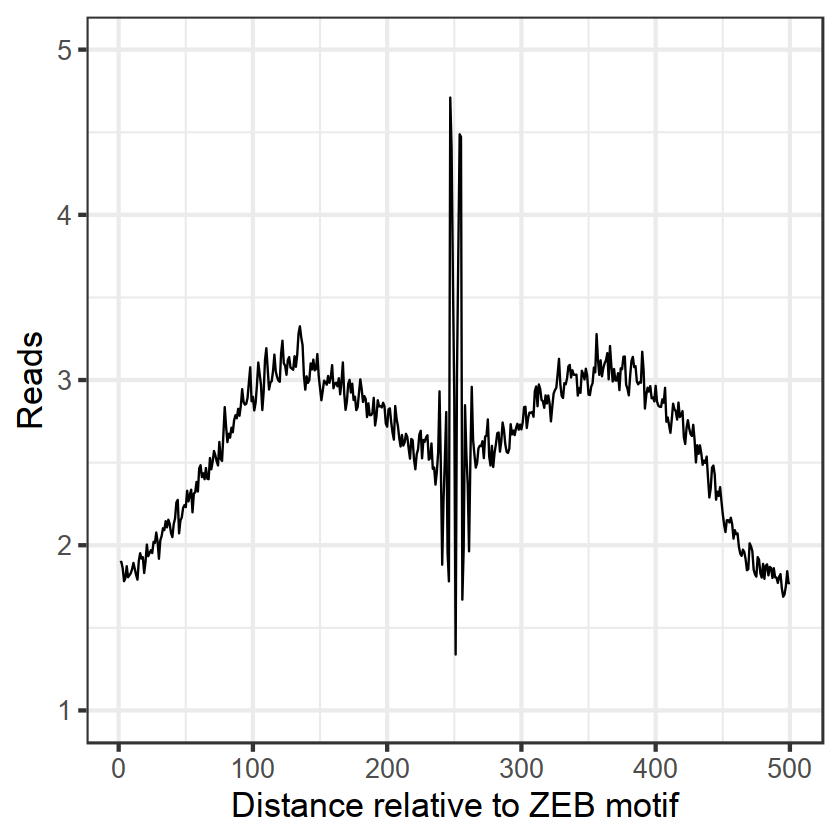

In [44]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(zeb_insertions))) +
geom_line(aes(x=x,y=y)) +
xlab("Distance relative to ZEB motif") +
ylab("Reads") + 
ylim(c(1,5)) +
theme_bw(base_size=20)

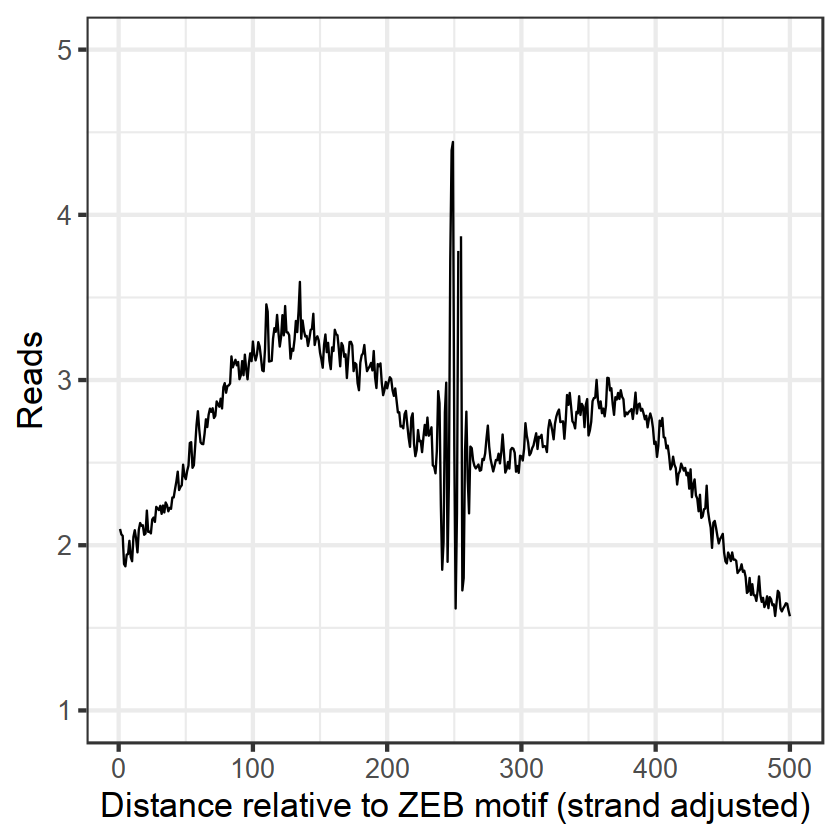

In [45]:
ggplot(data.frame(x=seq(500), 
                  y=c(colMeans(zeb_insertions_signed)))) +
geom_line(aes(x=x,y=y)) +
xlab("Distance relative to ZEB motif (strand adjusted)") +
ylab("Reads") + 
ylim(c(1,5)) +
theme_bw(base_size=20)

In [46]:
wilcox.test(zeb_insertions_signed[,150], zeb_insertions_signed[,350], paired=T)


	Wilcoxon signed rank test with continuity correction

data:  zeb_insertions_signed[, 150] and zeb_insertions_signed[, 350]
V = 2656208, p-value = 0.0003162
alternative hypothesis: true location shift is not equal to 0


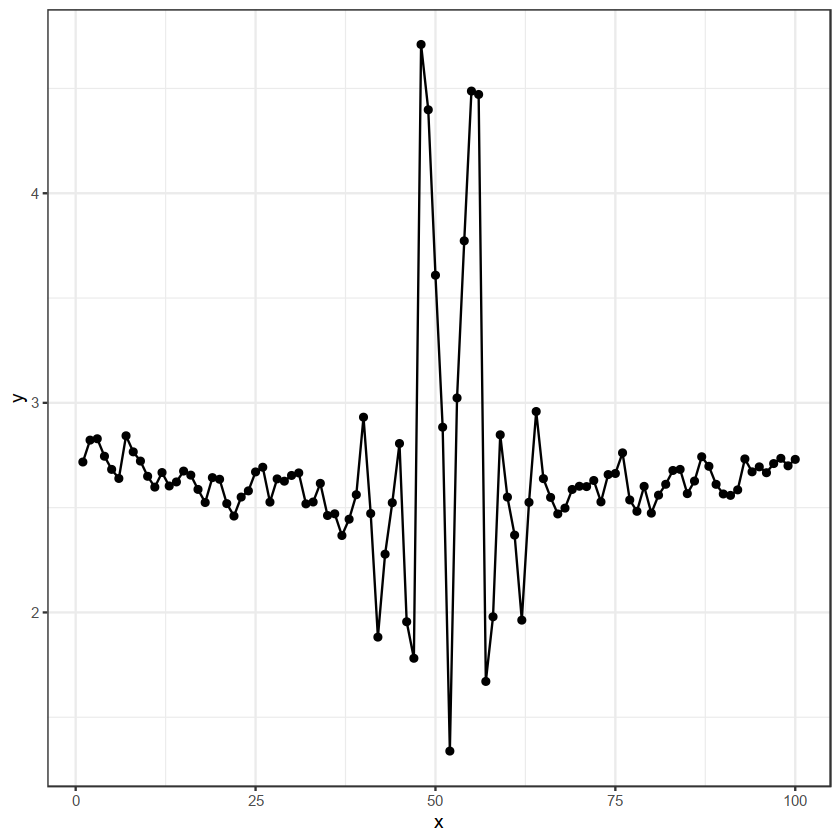

In [197]:
ggplot(data.frame(x=seq(100), 
                  y=colMeans(zeb_insertions)[200:299])) +
geom_point(aes(x=x,y=y)) +
geom_line(aes(x=x,y=y))+
theme_bw()

In [89]:
zeb_insertions_smc = get_matrix_from_bigwig("~/oak/projects/SMC_ZEB_KD_TomQ/bigwigs/control.bw",
                                    resize(zeb_fibr_ipsc_hits, width = 500, fix = "center"))

In [91]:
zeb_insertions_smc_kd = get_matrix_from_bigwig("~/oak/projects/SMC_ZEB_KD_TomQ/bigwigs/kd.bw",
                                    resize(zeb_fibr_ipsc_hits, width = 500, fix = "center"))

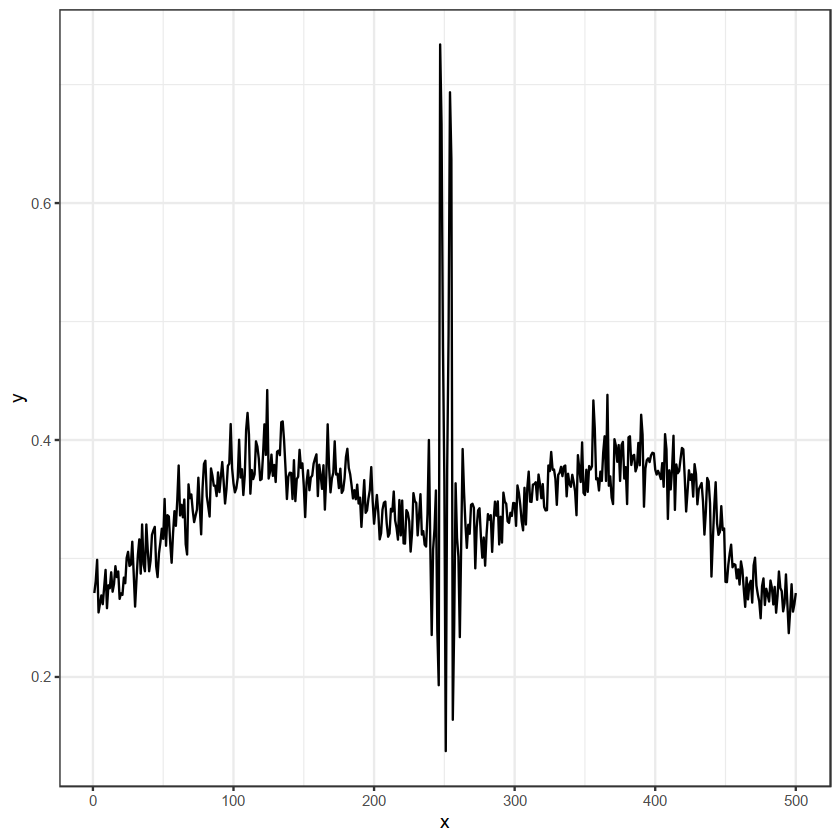

In [90]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(zeb_insertions_smc))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

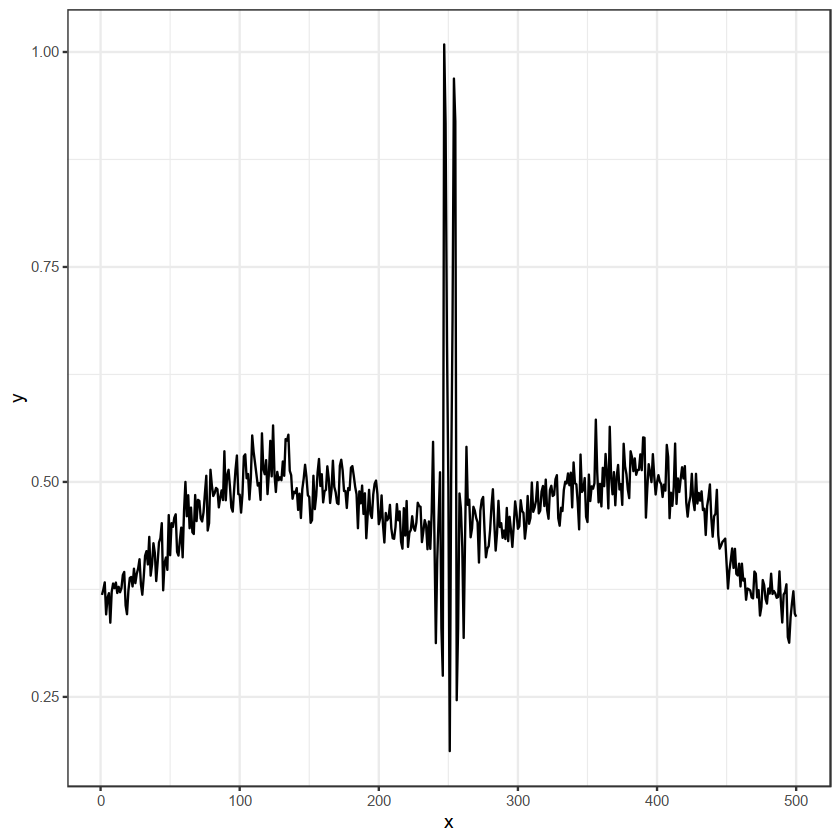

In [92]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(zeb_insertions_smc_kd))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

In [73]:
left_zeb = rowSums(zeb_insertions[,1:250])
right_zeb = rowSums(zeb_insertions[,250:500])

In [74]:
zeb_corrected = zeb_insertions
zeb_corrected[left_zeb>right_zeb, ] = zeb_corrected[left_zeb>right_zeb, rev(seq(500))]

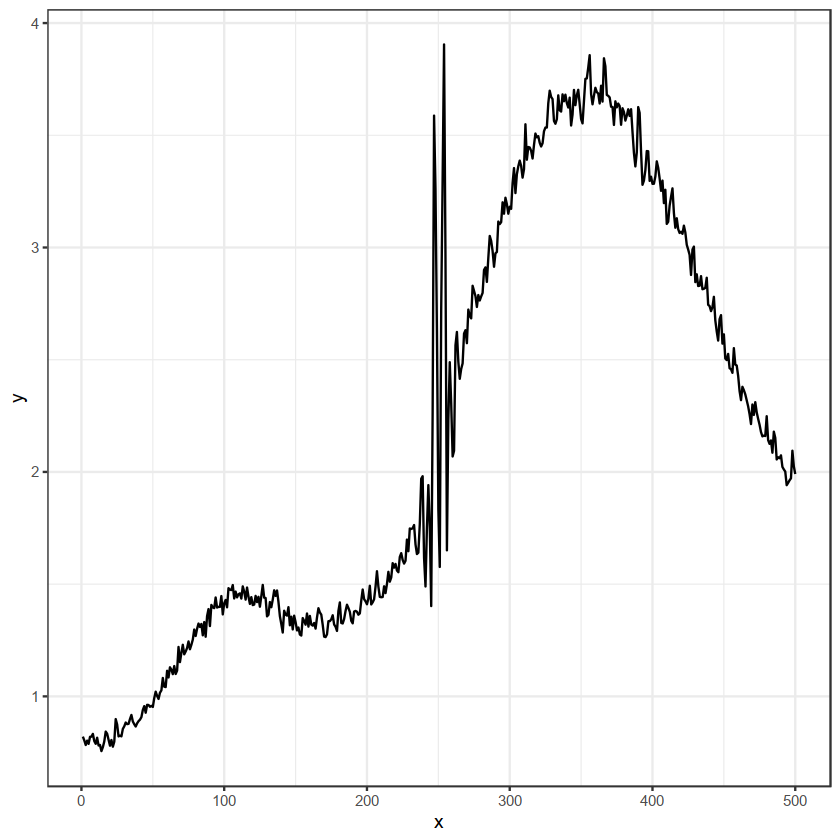

In [75]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(zeb_corrected))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

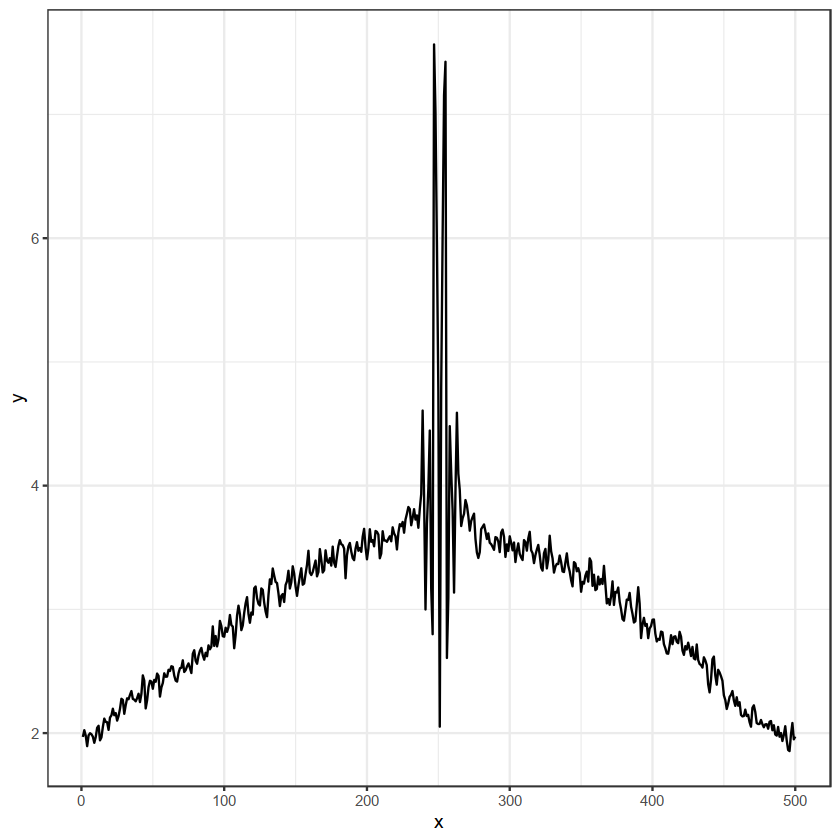

In [96]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(zeb_insertions_ipsc))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

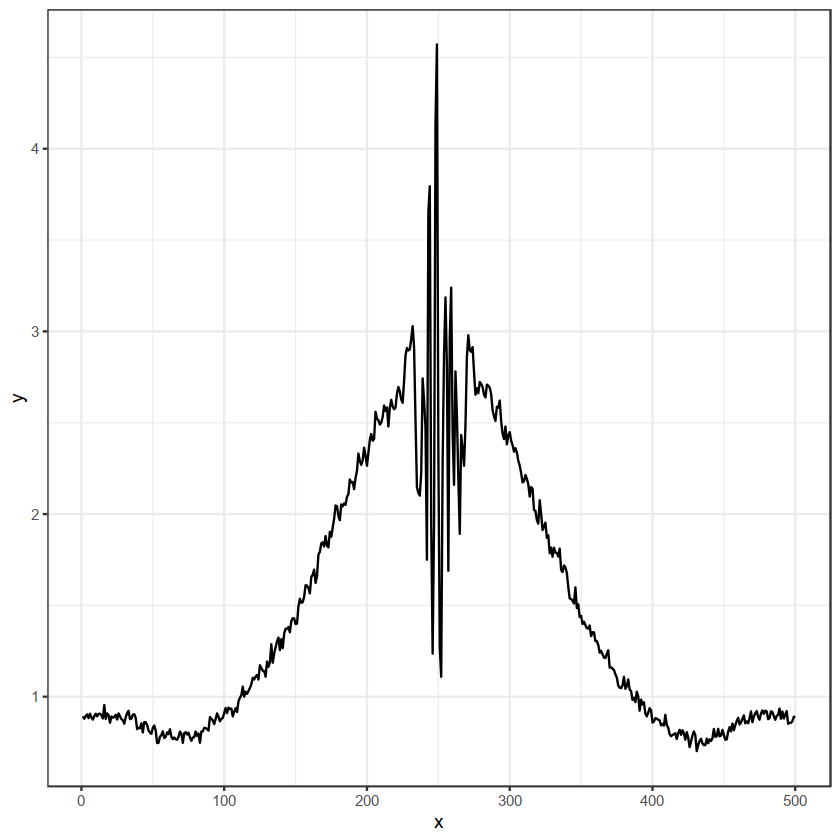

In [50]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(ap1_insertions))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

In [76]:
left_ap1 = rowSums(ap1_insertions[,1:250])
right_ap1 = rowSums(ap1_insertions[,250:500])

In [77]:
ap1_corrected = ap1_insertions
ap1_corrected[left_ap1>right_ap1, ] = ap1_corrected[left_ap1>right_ap1, rev(seq(500))]

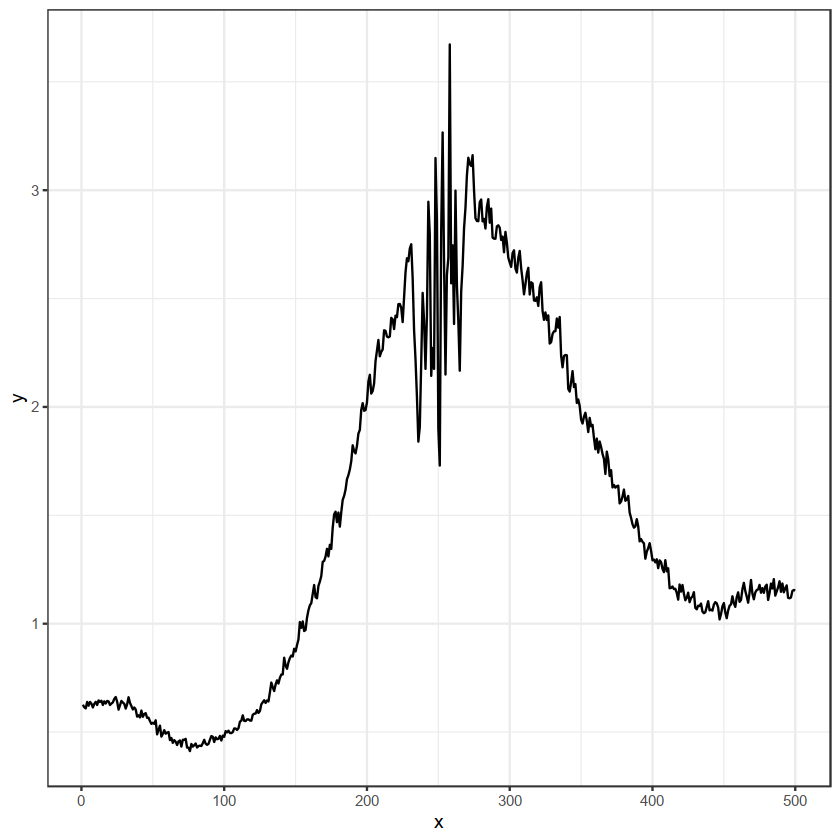

In [78]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(ap1_corrected))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

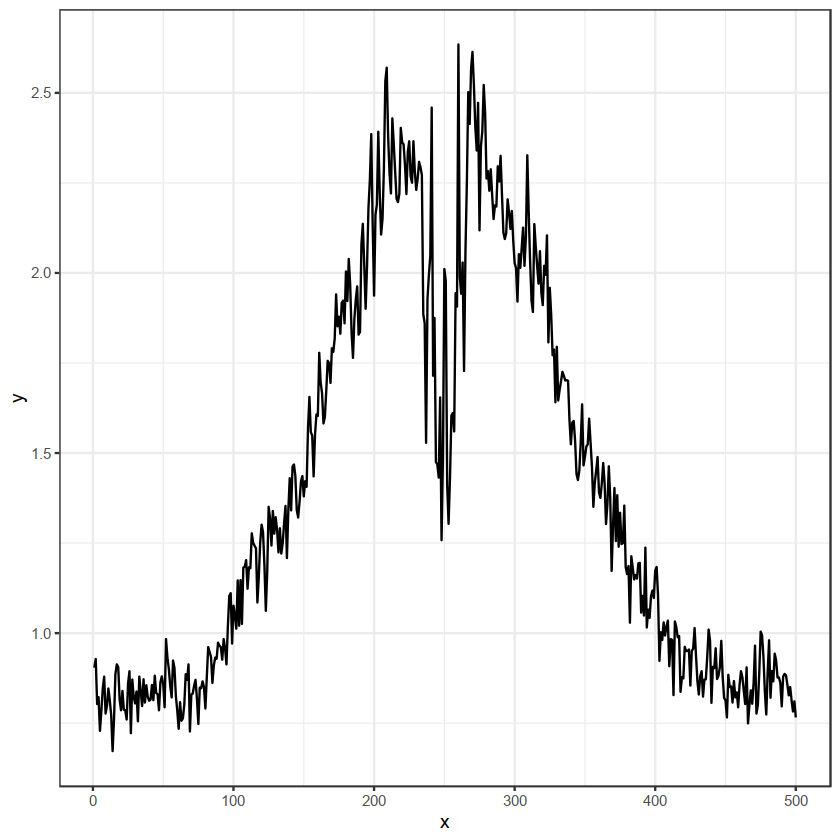

In [59]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(tead_insertions))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

# TMP

In [2]:
ctcf = read.table("~/mnase_tmp//ctcf.hits")
colnames(ctcf)[1:3] = c("chr", "start", "end")
ctcf = GRanges(ctcf)

ctcf

GRanges object with 1843 ranges and 5 metadata columns:
         seqnames              ranges strand |       V4        V5       V6
            <Rle>           <IRanges>  <Rle> | <factor> <numeric> <factor>
     [1]     chr1       804851-804865      * |     CTCF    8.0251        -
     [2]     chr1     1302118-1302132      * |     CTCF   16.1002        +
     [3]     chr1     1362227-1362241      * |     CTCF    9.0347        -
     [4]     chr1     1402160-1402174      * |     CTCF    14.424        -
     [5]     chr1     1430574-1430588      * |     CTCF    9.5223        +
     ...      ...                 ...    ... .      ...       ...      ...
  [1839]     chr1 247487284-247487298      * |     CTCF     8.551        -
  [1840]     chr1 247681485-247681499      * |     CTCF   14.8877        +
  [1841]     chr1 248268377-248268391      * |     CTCF    7.6541        -
  [1842]     chr1 248619084-248619098      * |     CTCF   10.1614        +
  [1843]     chr1 248924899-248924913      *

GRanges object with 1843 ranges and 5 metadata columns:
         seqnames              ranges strand |       V4        V5       V6
            <Rle>           <IRanges>  <Rle> | <factor> <numeric> <factor>
     [1]     chr1 151071215-151071229      * |     CTCF   18.2585        +
     [2]     chr1     2548187-2548201      * |     CTCF   17.8318        -
     [3]     chr1 117759021-117759035      * |     CTCF   17.4909        -
     [4]     chr1 162848030-162848044      * |     CTCF   17.4011        +
     [5]     chr1     7752996-7753010      * |     CTCF   17.3459        -
     ...      ...                 ...    ... .      ...       ...      ...
  [1839]     chr1   91900699-91900713      * |     CTCF    5.5607        +
  [1840]     chr1 245714919-245714933      * |     CTCF    5.5564        -
  [1841]     chr1 163884070-163884084      * |     CTCF    5.5563        +
  [1842]     chr1   83470129-83470143      * |     CTCF    5.5549        -
  [1843]     chr1 180533675-180533689      *

In [9]:
cur_insertions = get_matrix_from_bigwig("~/mnase_tmp//mnase_cuts_shifted.bw",
                                    resize(ctcf, width = 2000, fix = "center"))

In [20]:
cur_insertions = get_matrix_from_bigwig("~/mnase_tmp//mnase_cuts_shifted.bw",
                                    resize(ctcf[rev(order(ctcf$V5))][1:500], width = 2000, fix = "center"))

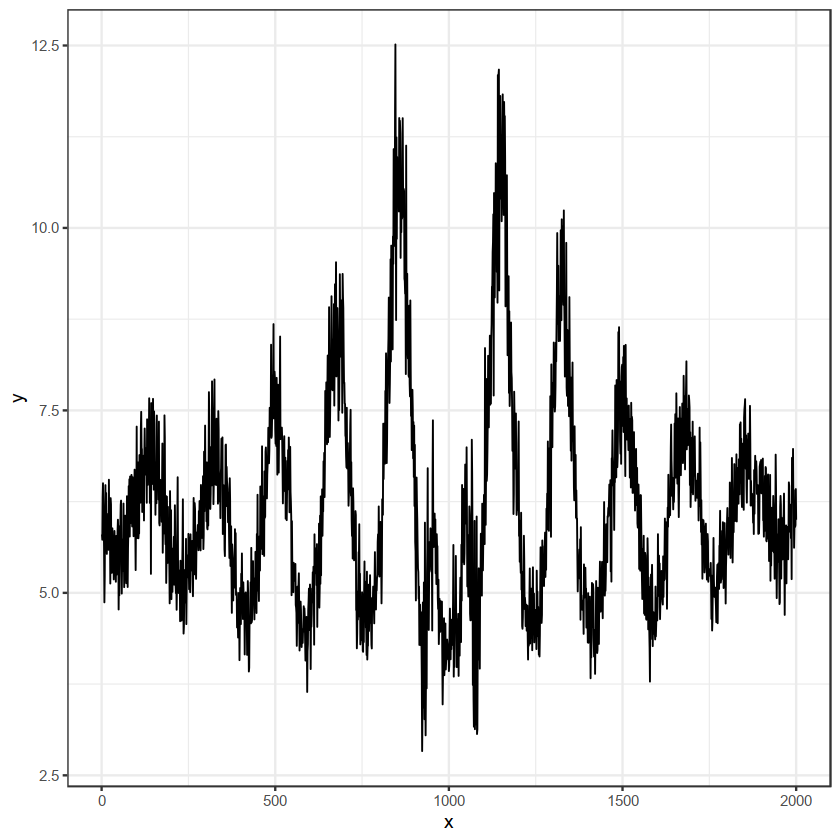

In [28]:
ggplot(data.frame(x=seq(2000), 
                  y=colMeans(cur_insertions))) +
geom_line(aes(x=x,y=y), size=0.4) +
theme_bw()